In [1]:
from fastai.vision.all import *

In [10]:
pip install ddgs


   ------------- -------------------------- 2/6 [hyperframe]
   -------------------------- ------------- 4/6 [h2]
   -------------------------- ------------- 4/6 [h2]
   --------------------------------- ------ 5/6 [ddgs]
   --------------------------------- ------ 5/6 [ddgs]
   ---------------------------------------- 6/6 [ddgs]

Note: you may need to restart the kernel to use updated packages.


C:\Work\Sources\fai\env\Lib\site-packages\IPython\utils\_process_win32.py:138: ResourceWarning: unclosed file <_io.BufferedWriter name=3>
  res = process_handler(cmd, _system_body)
C:\Work\Sources\fai\env\Lib\site-packages\IPython\utils\_process_win32.py:138: ResourceWarning: unclosed file <_io.BufferedReader name=4>
  res = process_handler(cmd, _system_body)
C:\Work\Sources\fai\env\Lib\site-packages\IPython\utils\_process_win32.py:138: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  res = process_handler(cmd, _system_body)


In [14]:
from ddgs import DDGS

In [16]:
dds = DDGS().images('forest photos', max_results=1)

In [17]:
dds

[{'title': 'Full HD Forest Wallpapers - Top Free Full HD Forest Backgrounds ...',
  'image': 'https://wallpaperaccess.com/full/2428648.jpg',
  'thumbnail': 'https://tse1.mm.bing.net/th/id/OIP.5Ci-944vUGQtFNna8rw5YwHaEo?cb=12&pid=Api',
  'url': 'https://wallpaperaccess.com/full-hd-forest',
  'height': 2400,
  'width': 3840,
  'source': 'Bing'}]

In [20]:
ims = (r["image"] for r in dds if "image" in r)

In [21]:
ims

<generator object <genexpr> at 0x00000195A3AEADC0>

In [23]:
p = L(ims)

In [24]:
p

(#1) ['https://wallpaperaccess.com/full/2428648.jpg']

In [66]:
def search_images(keywords, max_images=200, color='color'):
    results = DDGS().images(
        query=keywords,
        max_results=max_images,
        color=color,
    )
    return L(results).itemgot('image')

In [67]:
bird_url = search_images('bird photos', max_images=1)

In [68]:
bird_url[0]

'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg'

In [69]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(bird_url[0], dest)

Path('bird.jpg')

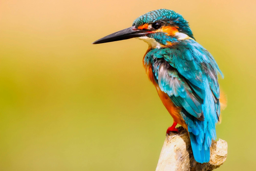

In [70]:
from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [71]:
searches='forest','bird'
path=Path('bird_or_not')
for o in searches:
    print(f' Downloading photos of {o}')
    dest = (path/o)
    dest.mkdir(parents=True, exist_ok=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    resize_images(path/o, max_size=400, dest=path/o)


In [72]:
path

Path('bird_or_not')

In [79]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

In [80]:
dls = DataBlock(blocks=(ImageBlock, CategoryBlock), get_items=get_image_files, splitter=RandomSplitter(valid_pct=0.2, seed=42),
                get_y=parent_label, item_tfms=[Resize(192,method='squish')]).dataloaders(path)

C:\Work\Sources\fai\env\Lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)
C:\Work\Sources\fai\env\Lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)
C:\Work\Sources\fai\env\Lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. _

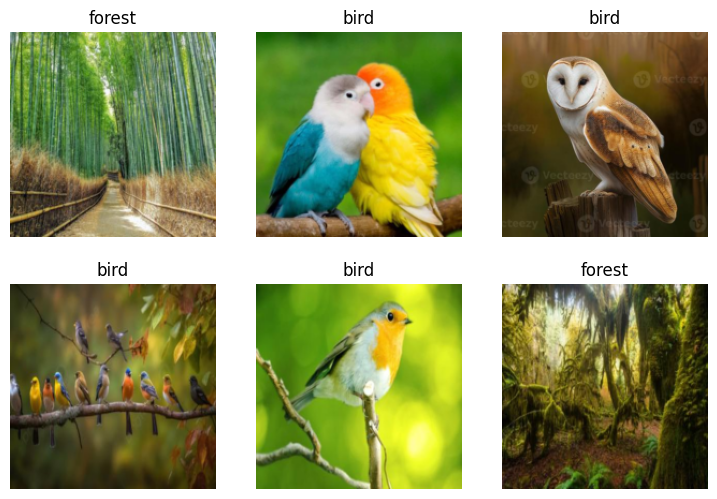

In [81]:
dls.show_batch(max_n=6)

In [82]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

In [77]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.226007,1.492057,0.388889,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.669165,0.775555,0.194444,00:06
1,0.452641,0.430464,0.138889,00:06
2,0.324752,0.325346,0.138889,00:06


In [83]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))

In [86]:
print(f" This is a : {is_bird}")
print(f" Probability = {probs[0]:.4f}")

 This is a : bird
 Probability = 0.9068
